In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


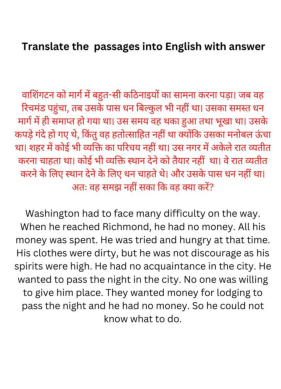

In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageFile

image_path = '/content/Hindi To English Translation Story.jpg'

try:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
except OSError as e:
    print(f"Error opening image {image_path}: {e}")

ImageFile.LOAD_TRUNCATED_IMAGES = True

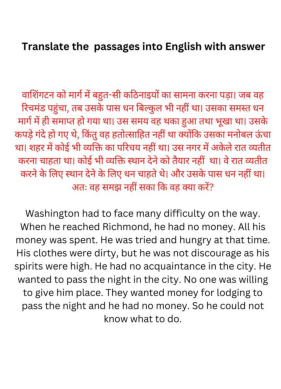

In [22]:
import os
import cv2
import matplotlib.pyplot as plt

image_path = '/content/Hindi To English Translation Story.jpg'

image = cv2.imread(image_path)

if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Error: Could not load image from {image_path}")

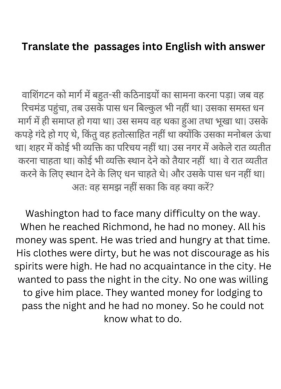

In [23]:
image_path = '/content/Hindi To English Translation Story.jpg'
image = Image.open(image_path)
image_resized = image.resize((256, 256))
image_gray = image.convert('L')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

In [25]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-hin
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-hin is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [26]:
import pytesseract

def perform_ocr(image):
    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
    extracted_text = pytesseract.image_to_string(image, lang='hin+eng')
    return extracted_text

image_path = '/content/Hindi To English Translation Story.jpg'
text = perform_ocr(image_path)
print(f"Extracted Text from {image_path}:\n{text}\n")

Extracted Text from /content/Hindi To English Translation Story.jpg:
Translate the passages into English with answer

वाशिंगटन को मार्ग में बहुत-सी कठिनाइयों का सामना करना पड़ा। जब वह
रिचमंड पहुंचा, तब उसके पास धन बिल्कुल भी नहीं था। उसका समस्त धन
मार्ग में ही समाप्त हो गया था। उस समय वह थका हुआ तथा भूखा था। उसके
कपड़े गंदे हो गए थे, किंतु वह हतोत्साहित नहीं था क्योंकि उसका मनोबल ऊंचा
था। शहर में कोई भी व्यक्ति का परिचय नहीं था। उस नगर में अकेले रात व्यतीत
करना चाहता था। कोई भी व्यक्ति स्थान देने को तैयार नहीं था। वे रात व्यतीत
करने के लिए स्थान देने के लिए धन चाहते थे। और उसके पास धन नहीं था।
अत: वह समझ नहीं सका कि वह क्या करें?

Washington had to face many difficulty on the way.
When he reached Richmond, he had no money. All his
money was spent. He was tried and hungry at that time.
His clothes were dirty, but he was not discourage as his
spirits were high. He had no acquaintance in the city. He
wanted to pass the night in the city. No one was willing
to give him place. They wanted m

In [27]:
# Saving the extracted text to a dictionary
extracted_texts = {}
image_file = 'Hindi To English Translation Story.jpg'
image_path = os.path.join(image_file)
text = perform_ocr(image_path)
extracted_texts[image_file] = text
print(f"Text from {image_file}:\n{text}\n")

Text from Hindi To English Translation Story.jpg:
Translate the passages into English with answer

वाशिंगटन को मार्ग में बहुत-सी कठिनाइयों का सामना करना पड़ा। जब वह
रिचमंड पहुंचा, तब उसके पास धन बिल्कुल भी नहीं था। उसका समस्त धन
मार्ग में ही समाप्त हो गया था। उस समय वह थका हुआ तथा भूखा था। उसके
कपड़े गंदे हो गए थे, किंतु वह हतोत्साहित नहीं था क्योंकि उसका मनोबल ऊंचा
था। शहर में कोई भी व्यक्ति का परिचय नहीं था। उस नगर में अकेले रात व्यतीत
करना चाहता था। कोई भी व्यक्ति स्थान देने को तैयार नहीं था। वे रात व्यतीत
करने के लिए स्थान देने के लिए धन चाहते थे। और उसके पास धन नहीं था।
अत: वह समझ नहीं सका कि वह क्या करें?

Washington had to face many difficulty on the way.
When he reached Richmond, he had no money. All his
money was spent. He was tried and hungry at that time.
His clothes were dirty, but he was not discourage as his
spirits were high. He had no acquaintance in the city. He
wanted to pass the night in the city. No one was willing
to give him place. They wanted money for lodging to

In [28]:
!pip install gradio

In [30]:
import gradio as gr
from PIL import Image
import pytesseract
import re

def perform_ocr(image):

    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
    extracted_text = pytesseract.image_to_string(image, lang='hin+eng')
    return extracted_text

def search_and_highlight(text, keyword):
    highlighted_text = re.sub(f"({keyword})", r"<mark>\1</mark>", text, flags=re.IGNORECASE)
    return highlighted_text

def ocr_and_search(image, keyword):
    if image is None:
        return "Please upload an image."

    extracted_text = perform_ocr(image)

    if keyword:
        highlighted_text = search_and_highlight(extracted_text, keyword)
        return highlighted_text
    else:
        return extracted_text

iface = gr.Interface(
    fn=ocr_and_search,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Textbox(label="Enter keyword to search (optional)")
    ],
    outputs=gr.HTML(label="Extracted and Highlighted Text"),
    title="OCR and Keyword Search",
    description="Upload an image to extract text using OCR and optionally search for keywords in the extracted text."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9385c8232e81ae3dae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
